In [96]:
#importando Bibliotecas 
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sc

In [97]:
#Lendo dados 
dados = pd.read_csv('dados.csv')
dados.head(5)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [98]:
#Verificando informações dos dados (Colunas, nulos e tipos)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [99]:
#Verificando os valores únicos de da coluna "Anos de Estudo" (.unique) e na sequência (sorted())
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [100]:
#Verificar a "Idade" mínima 
dados.Idade.min()

13

In [101]:
#Verificar a "Idade" máxima
dados.Idade.max()

99

In [102]:
#Juntando as Idades máxima e mínima em um print()
print('De %s até %s anos' % (dados.Idade.min(), dados.Idade.max()))

De 13 até 99 anos


In [103]:
#Coletando as Altura máxima e mínima em um print()
print('De %s até %s metros' % (dados.Altura.min(), dados.Altura.max()))

De 1.339244614 até 2.028496765 metros


In [104]:
#Contagem da coluna sexo
frequencia = dados.Sexo.value_counts()
frequencia

Sexo
0    53250
1    23590
Name: count, dtype: int64

In [105]:
#Porcentagem da coluna Sexo
percentual = dados.Sexo.value_counts(normalize=True) * 100
percentual

Sexo
0    69.299844
1    30.700156
Name: proportion, dtype: float64

In [106]:
#Colocando dados de frequencia e percentual em um DataFrame
dist_freq_qualitativas = pd.DataFrame({'Frequência':frequencia, 'Procentagem (%)':percentual})
dist_freq_qualitativas

,Frequência,Procentagem (%)
Sexo,,
0,53250,69.299844
1,23590,30.700156


In [107]:
#Renomeando os dados de sexo do dataframe 'dist_freq_qualitativas'
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
dist_freq_qualitativas

,Frequência,Procentagem (%)
Sexo,,
Masculino,53250,69.299844
Feminino,23590,30.700156


In [108]:
#Classificando as colunas de Sexo e Cor (de int64, para str)
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

In [109]:
#Colocando em um df a classificação a cima
frequencia = pd.crosstab(dados.Sexo, 
                        dados.Cor)
frequencia.rename(index = sexo, inplace=True)
frequencia.rename(columns = cor, inplace=True)

frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [110]:
#Modificando o percentual
percentual = pd.crosstab(dados.Sexo, 
                        dados.Cor,
                        normalize=True) * 100
percentual.rename(index = sexo, inplace=True)
percentual.rename(columns = cor, inplace=True)

percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [111]:
#Calulando a renada média dos dados
percentual = pd.crosstab(dados.Sexo, 
                        dados.Cor,
                        aggfunc = 'mean',
                        values = dados.Renda)
percentual.rename(index = sexo, inplace=True)
percentual.rename(columns = cor, inplace=True)

percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [112]:
#Verificando a Renda dos dados mínimo
dados.Renda.min()

0

In [113]:
#Verificando a Renda dos dados máximo
dados.Renda.max()

200000

In [114]:
#Classificando o limite da Renda
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [115]:
#Criando uma lables para a classificação definida em classe
labels = ['E', 'D', 'C', 'B', 'A']

In [116]:
# Criando tabela de classificação de Renda 
pd.cut(x = dados.Renda,
    bins = classes,
    labels = labels,
    include_lowest = True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [117]:
#Cotagem da tabela a cima 
pd.value_counts(
    pd.cut(x = dados.Renda,
    bins = classes,
    labels = labels,
    include_lowest = True)
)

C:\Users\ingri\AppData\Local\Temp\ipykernel_15440\2083988126.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(


Renda
E    49755
D    16700
C     7599
B     2178
A      608
Name: count, dtype: int64

In [118]:
#percentual de renda entra as classes
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
        bins = classes,
        labels = labels,
        include_lowest = True),
    normalize = True
)
percentual

C:\Users\ingri\AppData\Local\Temp\ipykernel_15440\746232162.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(


Renda
E    0.647514
D    0.217335
C    0.098894
B    0.028345
A    0.007913
Name: proportion, dtype: float64

C:\Users\ingri\AppData\Local\Temp\ipykernel_15440\2512374010.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura)


<Axes: title={'center': 'Distribuição de Frequências - Altura - KDE'}, xlabel='Metros', ylabel='Density'>

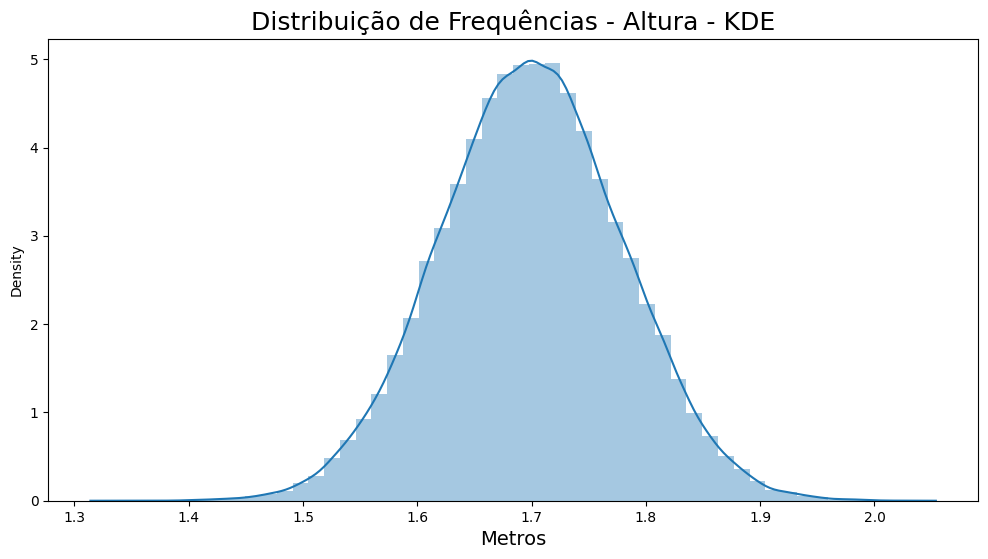

In [119]:
#Criando um gráfico da frenquência da altura dos dados com o Seaborn
ax = sns.distplot(dados.Altura)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<Axes: >

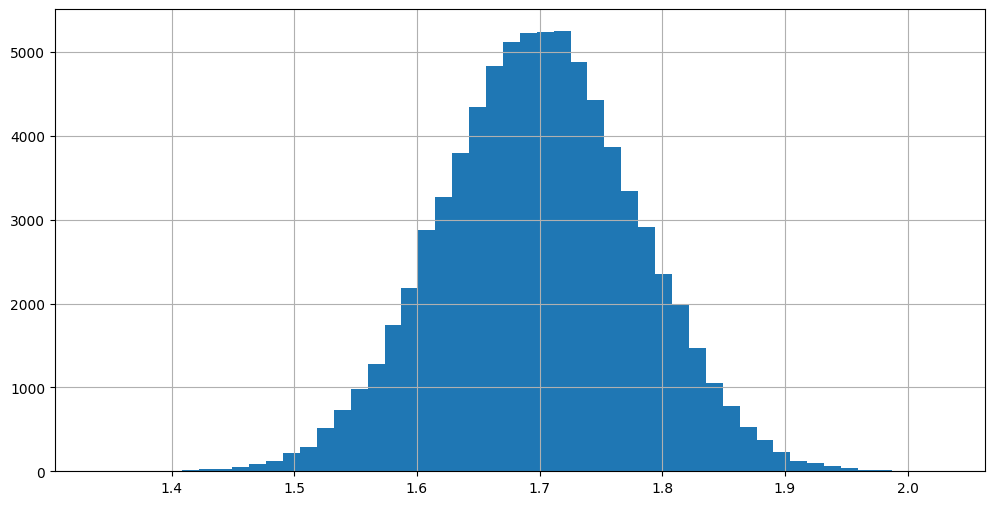

In [120]:
#riando um gráfico da frenquência da altura dos dados com Pandas
dados.Altura.hist(bins = 50, figsize=(12,6))

### MEDIDAS DE TENDÊNCIA CENTRAL

In [121]:
#Criando um DataFrame para exemplificar a média
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                            'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                            'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                index = ['Matemática',
                            'Português',
                            'Inglês',
                            'Geografia',
                            'História',
                            'Física',
                            'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)

df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [122]:
#Código da média
df['Fulano'].mean()

7.714285714285714

In [123]:
#Média da Renda
dados.Renda.mean()

2000.3831988547631

In [124]:
#Calculando a média da Renda por Sexo
dados.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

In [125]:
#verificando notas
notas_fulano = df.Fulano
notas_fulano

Matemática     8
Português     10
Inglês         4
Geografia      8
História       6
Física        10
Química        8
Name: Fulano, dtype: int64

In [126]:
#Cálculo da mediana
notas_fulano.median()

8.0

In [127]:
#Claculando a Renda mediana dos dados
dados.Renda.median()

1200.0

In [128]:
#Outra maneira de retirar a mediana
dados.Renda.quantile()


1200.0

In [129]:
#Verificando a moda das notas dos alunos
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [130]:
#Calculando a moda da Renda
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

C:\Users\ingri\AppData\Local\Temp\ipykernel_15440\523925465.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query('Renda < 20000').Renda)


<Axes: xlabel='Renda', ylabel='Density'>

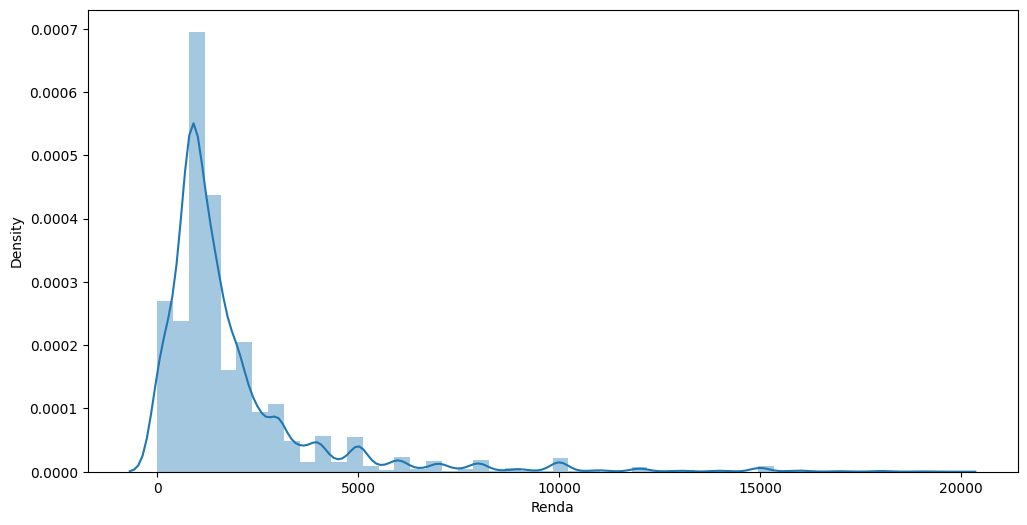

In [131]:
# Verificando a assimetria dos dados Renda
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12, 6)

ax

C:\Users\ingri\AppData\Local\Temp\ipykernel_15440\24534230.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura)


<Axes: xlabel='Altura', ylabel='Density'>

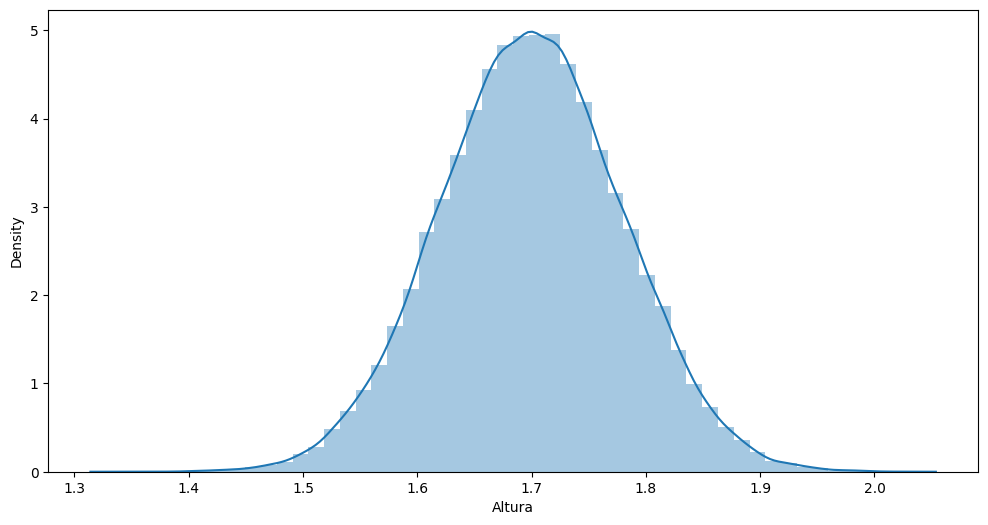

In [132]:
# Verificando a assimetria dos dados da Altura
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(12, 6)

ax

C:\Users\ingri\AppData\Local\Temp\ipykernel_15440\3310698876.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Anos de Estudo'], bins = 17)


NameError: name 'figure' is not defined

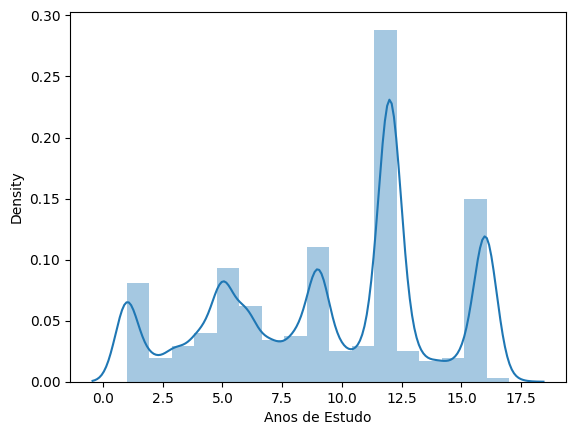

In [133]:
# Verificando a assimetria dos dados de Anos de Estudo
ax = sns.distplot(dados['Anos de Estudo'], bins = 17)
ax = figure.set_size_inches(12, 6)

ax

In [ ]:
#Mediana da renda por porcentagem
dados.Renda.quantile([i / 100 for i in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

C:\Users\ingri\AppData\Local\Temp\ipykernel_15440\1649571936.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Idade,


<Axes: title={'center': 'Distribuição de Frequências Acumulada'}, xlabel='Anos', ylabel='Acumulado'>

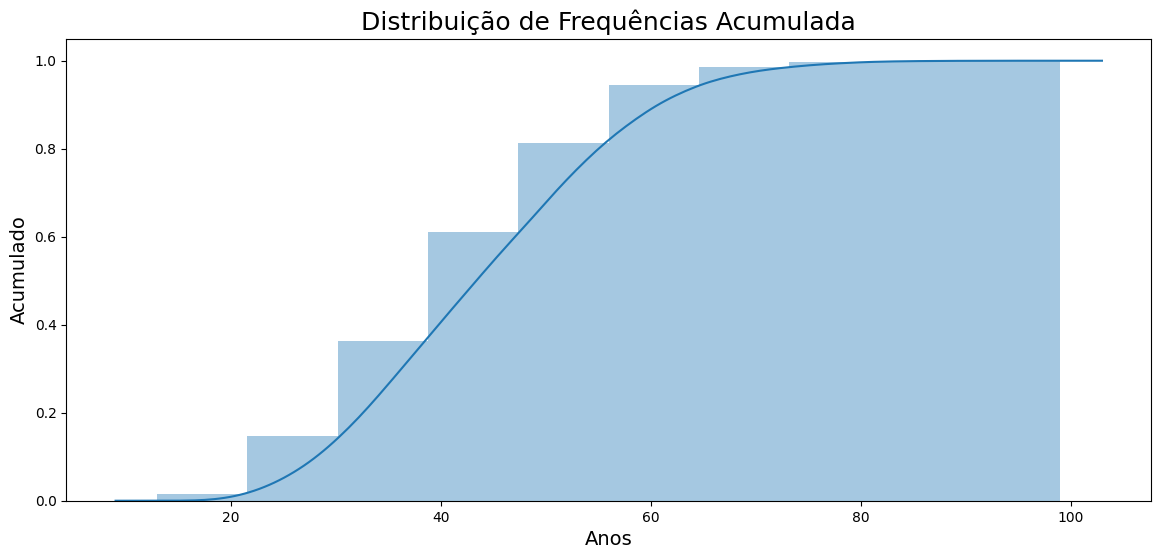

In [ ]:
#Gráfico da Distribuição de Frequências Acumulada
ax = sns.distplot(dados.Idade,
                hist_kws = {'cumulative': True},
                kde_kws = {'cumulative': True},
                                    bins = 10)
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)

ax


In [ ]:
#Mediana da Idade por porcentagem
dados.Idade.quantile([i / 100 for i in range(1, 100)])

0.01    21.0
0.02    22.0
0.03    23.0
0.04    24.0
0.05    25.0
        ... 
0.95    65.0
0.96    67.0
0.97    69.0
0.98    71.0
0.99    75.0
Name: Idade, Length: 99, dtype: float64

<Axes: title={'center': 'Altura'}, xlabel='Metros', ylabel='Sexo'>

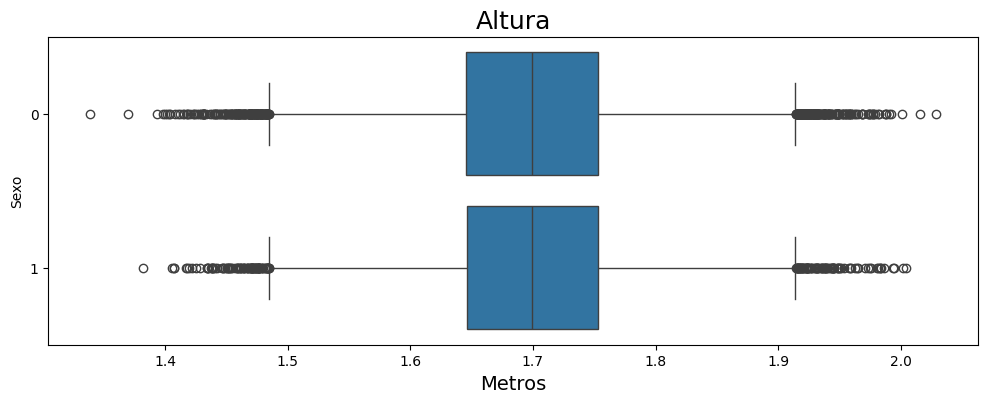

In [ ]:
#Bosxplot para comparar a altura entre os sexos
ax = sns.boxplot( x = 'Altura', y = 'Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)

ax

<Axes: title={'center': 'Renda'}, xlabel='R$'>

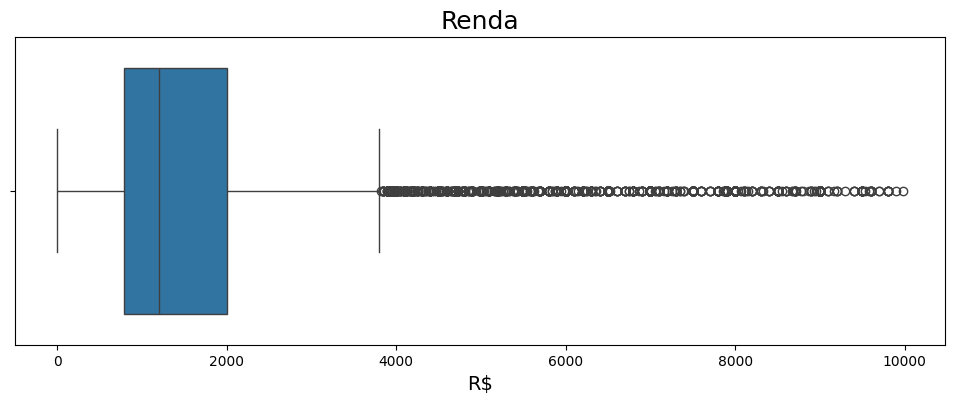

In [ ]:
##Bosxplot para comparar a renda de quem ganha mais de 10mil
ax = sns.boxplot( x = 'Renda', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)

ax

<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='Sexo'>

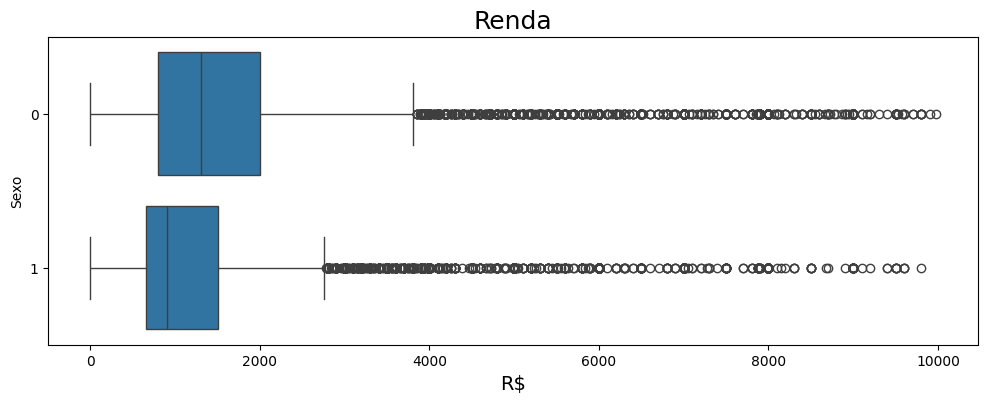

In [ ]:
#O mesmo boxplot em comparação aos diferentes sexos
ax = sns.boxplot( x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)

ax